In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [11]:
#loading the data from csv file to a Pandas DataFrame
import pandas as pd
insurance_dataset=pd.read_csv('insurance.csv')
print(insurance_dataset.head())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:

insurance_dataset.shape

(1338, 7)

In [12]:
#checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


C:\Users\RDP\AppData\Local\Temp\ipykernel_1508\1960592199.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


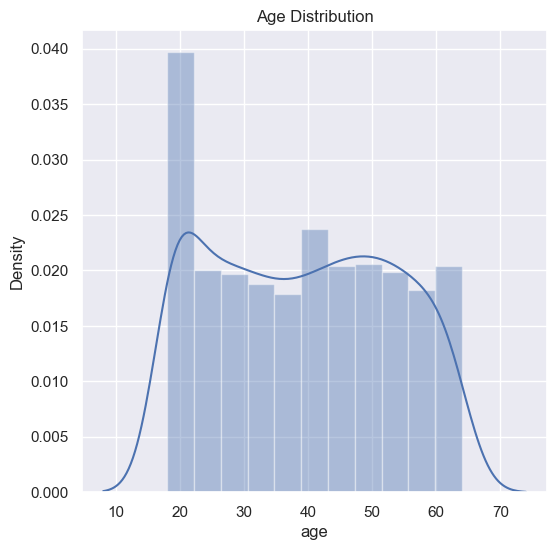

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title("Age Distribution")
plt.show()
    

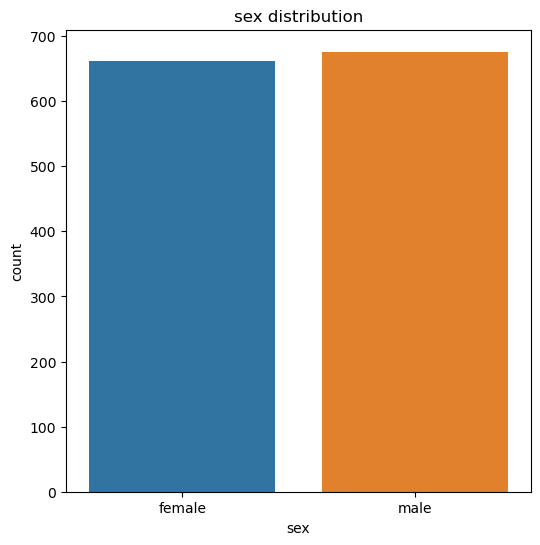

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset)
plt.title("sex distribution")
plt.show()

In [15]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\RDP\AppData\Local\Temp\ipykernel_1508\212689069.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


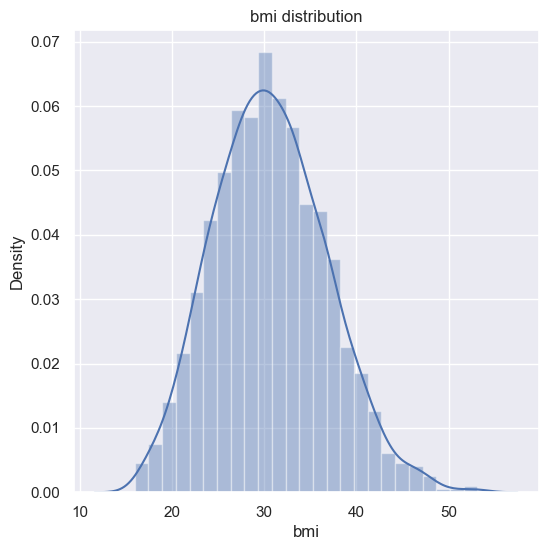

In [9]:
#bmi distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title("bmi distribution")
plt.show()

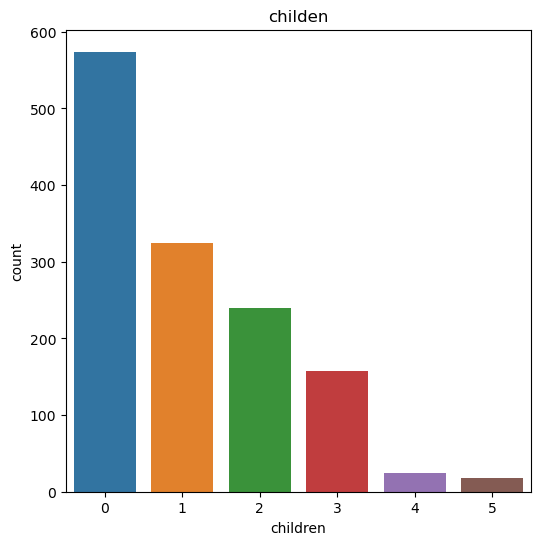

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('childen')
plt.show()

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

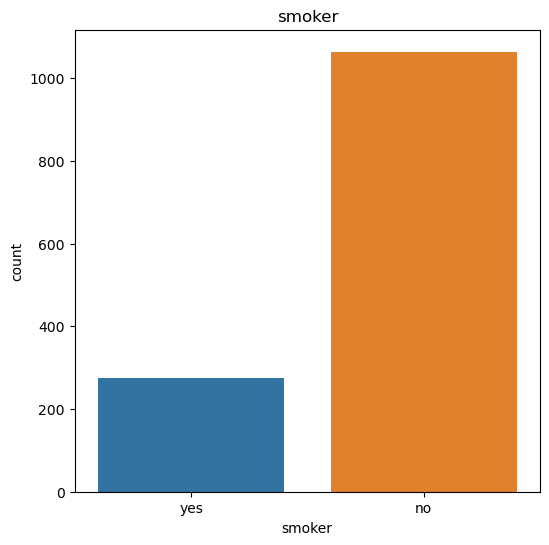

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
#smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('smoker')
plt.show()

In [19]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

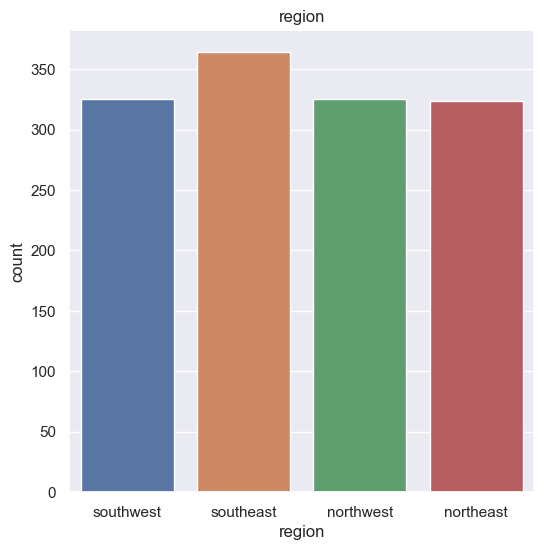

In [14]:
#region column
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title('region')
plt.show()

In [15]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

C:\Users\RDP\AppData\Local\Temp\ipykernel_16412\1642173046.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


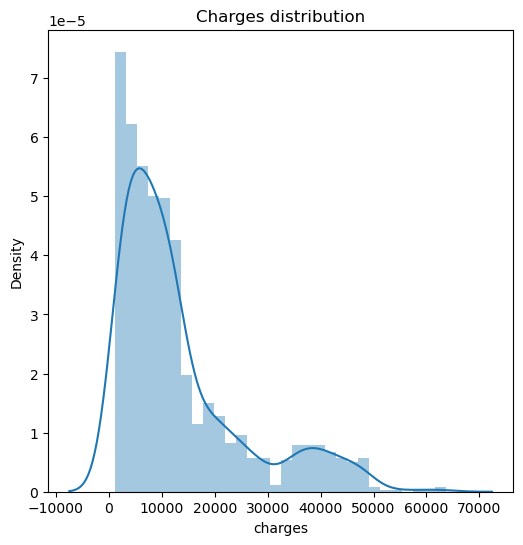

In [20]:
#distribution of charges vaklue
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges distribution')
plt.show()

In [22]:
#encoding sex column
insurance_dataset.replace({'sex':{'male':0, 'female':1}}, inplace=True)

#encoding 'smoker column'
insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)

#encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}},inplace = True)


In [23]:
X = insurance_dataset.drop(columns='charges',axis=1)
Y = insurance_dataset['charges']
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [24]:
#spliting the data into training data & testing data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [25]:
#model training
#linear regresion
#loading the Linear Regression model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)
LinearRegression(copy_X=True, fit_intercept=True,n_jobs=None)
#prediction on training data
training_data_prediction=regressor.predict(X_train)
#R squared value
r2_train=metrics.r2_score(Y_train,training_data_prediction)
print('R square value: ',r2_train)


R square value:  0.751505643411174


In [26]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)
r2_test=metrics.r2_score(Y_test,test_data_prediction)
print('R squared value :', r2_test)

R squared value : 0.7447273869684077


In [27]:
#Building a Predictive system

input_data=(18,0,33.77,1,1,0)


#changing input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)


#reshape the arrray
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = regressor.predict(input_data_reshaped)
print(prediction)
print('The insurance cost is USD', prediction[0])

[3701.06157802]
The insurance cost is USD 3701.061578023091


C:\Users\RDP\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
